##### Link： https://www.kaggle.com/datasets/arpitsinghaiml/u-s-crime-dataset
##### Description: This comprehensive dataset provides a deep dive into crime statistics across the United States. It encompasses a wide range of crime types, spanning from violent offenses like homicide and assault to property crimes such as theft and burglary. The data is meticulously organized, offering insights into crime trends, geographical variations, and temporal patterns.
##### Objectives / Goals: The goal is to analyze crime trends across different regions and time periods to identify patterns in crime rates and the influence of social or demographic factors. By doing so, we aim to better understand how human behaviors and regional factors correlate with crime prevalence, providing insights that may help in developing targeted crime prevention strategies.

In [2]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
import numpy as np
import random # Import the random module
import string # Import the string module
from scipy import stats
import math
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.cm as cm
from scipy.stats import norm

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv')
df.head() # Displaying the first 5 rows of the dataset to understand its structure

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [5]:
num_rows = len(df)
print(num_rows)

982638


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

In [36]:
df.replace("", np.nan, inplace=True)

In [37]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: f"{int(x):04}")

<ipython-input-37-5f1d260262fc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
<ipython-input-37-5f1d260262fc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])


In [38]:
categorical_columns = ['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent',
                       'Premis Desc', 'Status', 'Status Desc', 'Weapon Desc']
for col in categorical_columns:
    # Strip whitespace and convert to consistent casing
    df[col] = df[col].str.strip().str.upper()
    # Convert to categorical dtype
    df[col] = df[col].astype('category')

In [39]:
# Filter Vict Age to a realistic range (0 < age < 120)
df = df[(df['Vict Age'] > 0) & (df['Vict Age'] < 120)]

# Validate latitude and longitude ranges (for Los Angeles, typical lat/lon range)
df = df[(df['LAT'].between(33, 35)) & (df['LON'].between(-119, -117))]
df.rename(columns=lambda x: x.upper(), inplace=True)

<ipython-input-39-fffe0fed1e55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.upper(), inplace=True)


In [11]:
df

,DR_NO,DATE RPTD,DATE OCC,TIME OCC,AREA,AREA NAME,RPT DIST NO,PART 1-2,CRM CD,CRM CD DESC,...,STATUS,STATUS DESC,CRM CD 1,CRM CD 2,CRM CD 3,CRM CD 4,LOCATION,CROSS STREET,LAT,LON
1,200106753,2020-02-09,2020-02-08,1800,1,CENTRAL,182,1,330,BURGLARY FROM VEHICLE,...,IC,INVEST CONT,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,SOUTHWEST,356,1,480,BIKE - STOLEN,...,IC,INVEST CONT,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,VAN NUYS,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,INVEST CONT,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,1200,6,HOLLYWOOD,666,2,354,THEFT OF IDENTITY,...,IC,INVEST CONT,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
5,231808869,2023-04-04,2020-12-01,2300,18,SOUTHEAST,1826,2,354,THEFT OF IDENTITY,...,IC,INVEST CONT,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982630,241604405,2024-01-14,2024-01-13,0720,16,FOOTHILL,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,INVEST CONT,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
982631,242106032,2024-02-20,2024-02-17,2330,21,TOPANGA,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,INVEST CONT,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
982632,242004546,2024-01-16,2024-01-16,1510,20,OLYMPIC,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,INVEST CONT,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
982633,242011172,2024-08-20,2024-08-17,2300,20,OLYMPIC,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,INVEST CONT,341.0,NaN,NaN,NaN,3700 WILSHIRE BL,NaN,34.0617,-118.3066


In [41]:
num_rows = len(df)
print(num_rows)

721200


In [40]:
continuous_columns = ['VICT AGE', 'LAT', 'LON']
for col in continuous_columns:
    print(f"\nDescriptive Statistics for {col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    # Get the mode using scipy.stats.mode (returns a ModeResult object)
    mode_result = stats.mode(df[col], keepdims=True)
    print(f"Mode: {mode_result.mode[0]}")  # Access the mode value directly
    print(f"Standard Deviation: {df[col].std()}")


Descriptive Statistics for VICT AGE:
Mean: 39.52563921242374
Median: 37.0
Mode: 30
Standard Deviation: 15.592284053262903

Descriptive Statistics for LAT:
Mean: 34.075736153771494
Median: 34.0594
Mode: 34.1016
Standard Deviation: 0.11030400646205321

Descriptive Statistics for LON:
Mean: -118.35722204450913
Median: -118.3266
Mode: -118.2739
Standard Deviation: 0.10536001613654054


In [42]:
# Frequency table for 'Crime Type'
crime_type_freq = df['CRM CD DESC'].value_counts()

# Frequency table for 'Location'
location_freq = df['LOCATION'].value_counts()

# Frequency table for 'Victim Sex'
victim_sex_freq = df['VICT SEX'].value_counts()

# Display tables
print("Frequency Table for Crime Type:")
print(crime_type_freq)
print("\nFrequency Table for Location:")
print(location_freq)
print("\nFrequency Table for Victim Sex:")
print(victim_sex_freq)

Frequency Table for Crime Type:
CRM CD DESC
BATTERY - SIMPLE ASSAULT                          73403
THEFT OF IDENTITY                                 59675
BURGLARY FROM VEHICLE                             59382
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    51346
INTIMATE PARTNER - SIMPLE ASSAULT                 46020
                                                  ...  
LYNCHING - ATTEMPTED                                  1
TRAIN WRECKING                                        1
DRUNK ROLL - ATTEMPT                                  1
BOAT - STOLEN                                         0
FAILURE TO DISPERSE                                   0
Name: count, Length: 140, dtype: int64

Frequency Table for Location:
LOCATION
800 N  ALAMEDA                      ST      1306
7TH                                         1247
6TH                          ST             1231
6TH                                         1187
7TH                          ST             1154
                

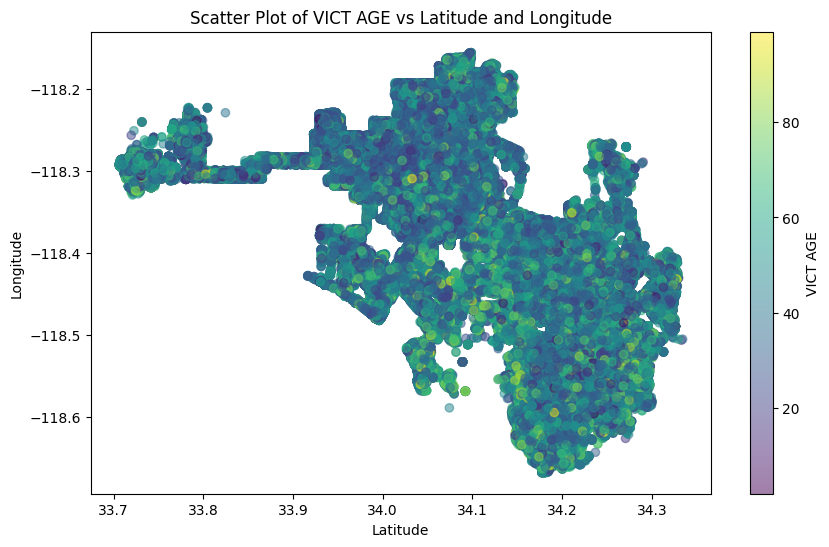

In [15]:
# scatter plot of VICT AGE vs LAT and LON

plt.figure(figsize=(10, 6))
plt.scatter(df['LAT'], df['LON'], c=df['VICT AGE'], cmap='viridis', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of VICT AGE vs Latitude and Longitude')
plt.colorbar(label='VICT AGE')
plt.show()

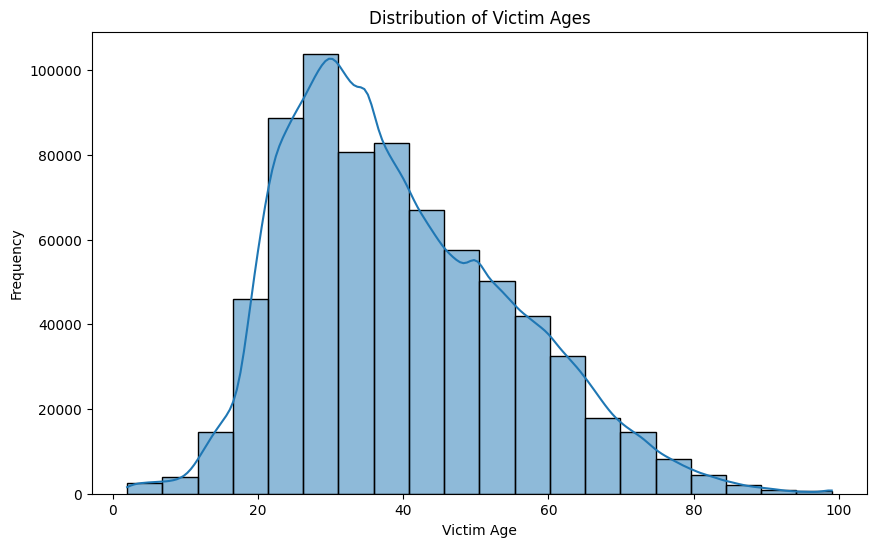

In [16]:
# Frequency map of VICT AGE
plt.figure(figsize=(10, 6))
sns.histplot(df['VICT AGE'], bins=20, kde=True)
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages')
plt.show()

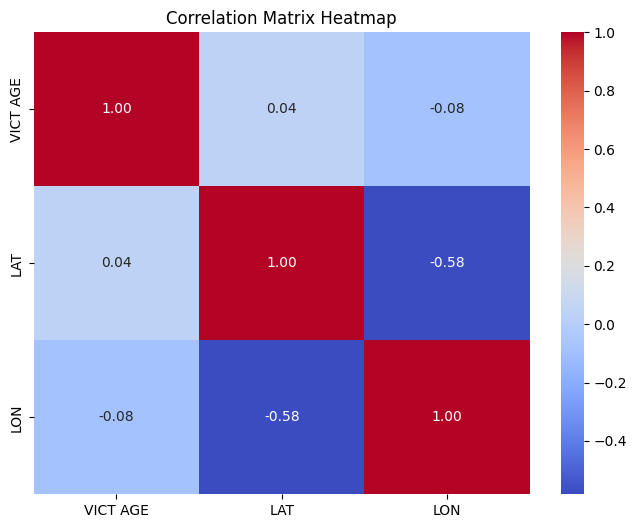

In [17]:
# Correlation Matrix Heatmap
correlation_matrix = df[['VICT AGE', 'LAT', 'LON']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### What can you conclude / observe about this data based on descriptive sentences?

##### The distribution of victim ages shows a higher frequency of incidents involving younger victims, particularly around the age of 20, with a decrease in frequency as age increases. This suggests that the majority of crime victims are relatively young, and the frequency drops as the age increases, as seen in both the descriptive statistics and the histogram. The standard deviation of 15.59 reflects a moderate spread of victim ages around the mean, indicating that a significant portion of the victims are within a similar age range. When looking at the geographic data, the latitude and longitude statistics show that crime incidents are dispersed across a wide area, with average values of 34.0757 (LAT) and -118.3572 (LON), and standard deviations of 0.11 and 0.105, respectively. This indicates that the crimes in this dataset are broadly distributed geographically, but the relatively small standard deviations suggest that most incidents occur within a certain concentrated region. The scatter plot of victim age versus location further reinforces this, showing that crimes happen across the area without a clear geographic concentration for specific age groups. In terms of crime types, the frequency table reveals that simple assaults are the most common crimes, with over 73,000 incidents, followed by identity theft and burglary from vehicles. These crime types make up a large proportion of the total incidents, suggesting that non-violent and property-related crimes dominate the dataset. Finally, examining the victim sex distribution, the data shows a relatively even split between male and female victims (M: 363,009 and F: 348,022), with a small number of victims categorized as X (unknown or other). This suggests that both genders are similarly affected by crime in this dataset.






## Problem 3.1.
##### Design at least two different inference tests to draw conclusions from the data.

In [18]:
crimes_by_area = df['AREA NAME'].value_counts()

# Display the crime counts by area
print(crimes_by_area)

AREA NAME
CENTRAL        50751
SOUTHWEST      46727
77TH STREET    45617
PACIFIC        41072
HOLLYWOOD      38277
SOUTHEAST      36078
N HOLLYWOOD    35436
OLYMPIC        35432
WILSHIRE       34895
TOPANGA        33747
NEWTON         32891
VAN NUYS       32780
WEST LA        32549
RAMPART        32434
WEST VALLEY    30441
MISSION        29551
NORTHEAST      28747
DEVONSHIRE     28625
HARBOR         27288
FOOTHILL       24183
HOLLENBECK     23679
Name: count, dtype: int64


##### Objective 1: To determine if there is a statistically significant difference in the crime rates between Central and Southwest, where most crimes happen.

##### Null Hypothesis (H01):There is no significant difference in the average crime rates between Central and Southwest.

##### Type I Error:The crime rates between the two locations are different when, in fact, they are the same.

##### Type II Error: The crime rates between the two locations are the same when they are actually different.

##### Test Type:This would be a means test of two groups (independent t-test) to compare the average crime rates in two locations.

##### Study Power: 0.8 (80%)
##### Statistical Significance Level (α): 0.05

##### Minimum Detectable Effect (MDE): below

In [58]:
# Filter the dataset for Central and Southwest areas
central_crimes = df[df['AREA NAME'] == 'CENTRAL']
southwest_crimes = df[df['AREA NAME'] == 'SOUTHWEST']

# n1 and n2: Get the number of crimes (total observations) in Central and Southwest
n1 = central_crimes.shape[0]
n2 = southwest_crimes.shape[0]
total_crimes = n1 + n2
P1 = n1 / total_crimes
P2 = n2 / total_crimes
# Output the values
print(f"n1 (Central crimes): {n1}")
print(f"n2 (Southwest crimes): {n2}")
print(f"P1 (Central crime rate): {P1:.4f}")
print(f"P2 (Southwest crime rate): {P2:.4f}")

n1 (Central crimes): 50751
n2 (Southwest crimes): 46727
P1 (Central crime rate): 0.5206
P2 (Southwest crime rate): 0.4794


In [59]:
# Input values
alpha = 0.05
power = 0.8
P1 = 0.5206
P2 = 0.4794
n1 = 50751
n2 = 46727

# Z-scores for the significance level and power
Z_alpha = norm.ppf(1 - alpha / 2)
Z_beta = norm.ppf(power)

# Calculate the MDE
MDE = Z_alpha * np.sqrt((P1 * (1 - P1)) / n1) + Z_beta * np.sqrt((P2 * (1 - P2)) / n2)

# Output the result
print(f"Minimum Detectable Effect (MDE): {MDE:.4f}")

Minimum Detectable Effect (MDE): 0.0063


##### Objective 2: To test if the distribution of a specific crime type (e.g., violent crimes) differs significantly across multiple age groups (e.g., 18-25, 26-35, 36-45, etc.).

##### Null Hypothesis (H02):The distribution of violent crimes is the same across all age groups.

##### Type I Error:A The distribution of violent crimes differs across age groups when, in fact, it does not.

##### Type II Error: There is no difference in violent crime distribution across age groups when one actually exists.

##### Test Type:This would be a proportion test of multiple groups (Chi-square test for independence), comparing the distribution of a categorical variable (crime type) across multiple age groups.

##### Study Power: 0.8 (80%)
##### Statistical Significance Level (α): 0.05
##### Minimum Detectable Effect (MDE): below

In [26]:
#Set the parameters for power analysis
alpha = 0.05  # significance level
power = 0.8   # power level
n = 26413     # sample size (number of observations)

# Calculate the z-scores for alpha and power
z_alpha = norm.ppf(1 - alpha / 2)
z_beta = norm.ppf(power)

# Assume the standard deviation of the data (estimated from the dataset)
sigma = np.std(df['VICT AGE'].dropna())  # Replace with your column of interest

# Calculate the MDE
mde = (z_alpha + z_beta) * sigma * np.sqrt(2 / n)

# Output the result
print(f"Minimum Detectable Effect (MDE): {mde}")


Minimum Detectable Effect (MDE): 0.3801188496716177


## Problem 3.2. Prepare for tests.

##### Test 1

In [55]:
from scipy import stats
from scipy.stats import norm, shapiro
# Filter the dataset for Central and Southwest areas
central_crime_rates = df[df['AREA NAME'] == 'CENTRAL']['CRM CD']
southwest_crime_rates = df[df['AREA NAME'] == 'SOUTHWEST']['CRM CD']

# Perform Shapiro-Wilk test for Central's crime rates
stats_central, p_value_central = shapiro(central_crime_rates)
print(f"Shapiro-Wilk Test for Central - P-Value: {p_value_central}")

# Perform Shapiro-Wilk test for Southwest's crime rates
stat_southwest, p_value_southwest = shapiro(southwest_crime_rates)
print(f"Shapiro-Wilk Test for Southwest - P-Value: {p_value_southwest}")

# Interpret the p-values for both areas
if p_value_central > 0.05:
    print("Central's crime rates are normally distributed.")
else:
    print("Central's crime rates are not normally distributed.")

if p_value_southwest > 0.05:
    print("Southwest's crime rates are normally distributed.")
else:
    print("Southwest's crime rates are not normally distributed.")

Shapiro-Wilk Test for Central - P-Value: 3.900564120389452e-96
Shapiro-Wilk Test for Southwest - P-Value: 1.450058137587652e-88
Central's crime rates are not normally distributed.
Southwest's crime rates are not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50751.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46727.
  res = hypotest_fun_out(*samples, **kwds)


##### Test 2

In [62]:
# Create age group bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
violent_crime_data['Age Group'] = pd.cut(violent_crime_data['VICT AGE'], bins=bins, labels=labels)

# Run the Shapiro-Wilk test on the age distribution for the entire dataset
victim_ages = violent_crime_data['VICT AGE'].dropna()  # Drop any NaN values

# Check if there are enough data points for the Shapiro-Wilk test
if len(victim_ages) < 3:
    print("Error: Insufficient data for Shapiro-Wilk test (at least 3 data points are required).")
    print("Consider reviewing the 'violent_crimes' list or the dataset for more data.")
else:
    # Perform the Shapiro-Wilk test for normality on the victim ages
    stat, p_value = stats.shapiro(victim_ages)

print(f"Shapiro-Wilk Test Statistic: {stats}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("The data is normally distributed")
else:
    print("The data is not normally distributed")

Shapiro-Wilk Test Statistic: <module 'scipy.stats' from '/usr/local/lib/python3.10/dist-packages/scipy/stats/__init__.py'>
P-Value: 4.2362533202697186e-66
The data is not normally distributed


<ipython-input-62-240a7ad4eea5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crime_data['Age Group'] = pd.cut(violent_crime_data['VICT AGE'], bins=bins, labels=labels)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26413.
  res = hypotest_fun_out(*samples, **kwds)


## Problem 3.3. Execute tests.

##### Test 1

In [61]:
# Create an array of crime counts for the two locations
crime_counts = [n1, n2]

# Perform a chi-square test to compare crime counts
chi2_stat, p_value = stats.chisquare(crime_counts)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
# Interpretation of Chi-Square Test
if chi2_p_value < 0.05:
    print("There is a significant difference in the crime rates between Central and Southwest.")
else:
    print("There is no significant difference in the crime rates between Central and Southwes.")

Chi-Square Statistic: 166.11518496481258
P-Value: 5.220415940150697e-38
There is a significant difference in the crime rates between Central and Southwest.


##### Test 2

In [53]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(violent_crime_data['Age Group'], violent_crime_data['CRM CD DESC'])

# Perform the Chi-Square test for independence
chi2_stat, chi2_p_value, dof, expected = chi2_contingency(contingency_table)

# Output the Chi-Square test results
print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"P-Value: {chi2_p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretation of Chi-Square Test
if chi2_p_value < 0.05:
    print("There is a significant difference in the distribution of violent crimes across age groups.")
else:
    print("There is no significant difference in the distribution of violent crimes across age groups.")


Chi-Square Statistic: 178.92292584639557
P-Value: 5.7455365944656357e-36
Degrees of Freedom: 6
Expected Frequencies Table:
[[  52.85480635 1905.14519365]
 [ 142.28686632 5128.71313368]
 [ 191.38946731 6898.61053269]
 [ 131.08423882 4724.91576118]
 [  95.50577367 3442.49422633]
 [  65.13720516 2347.86279484]
 [  34.74164237 1252.25835763]]
There is a significant difference in the distribution of violent crimes across age groups.


## Problem 5.1. Compare to LLM

##### Google Gemini

##### Test 1

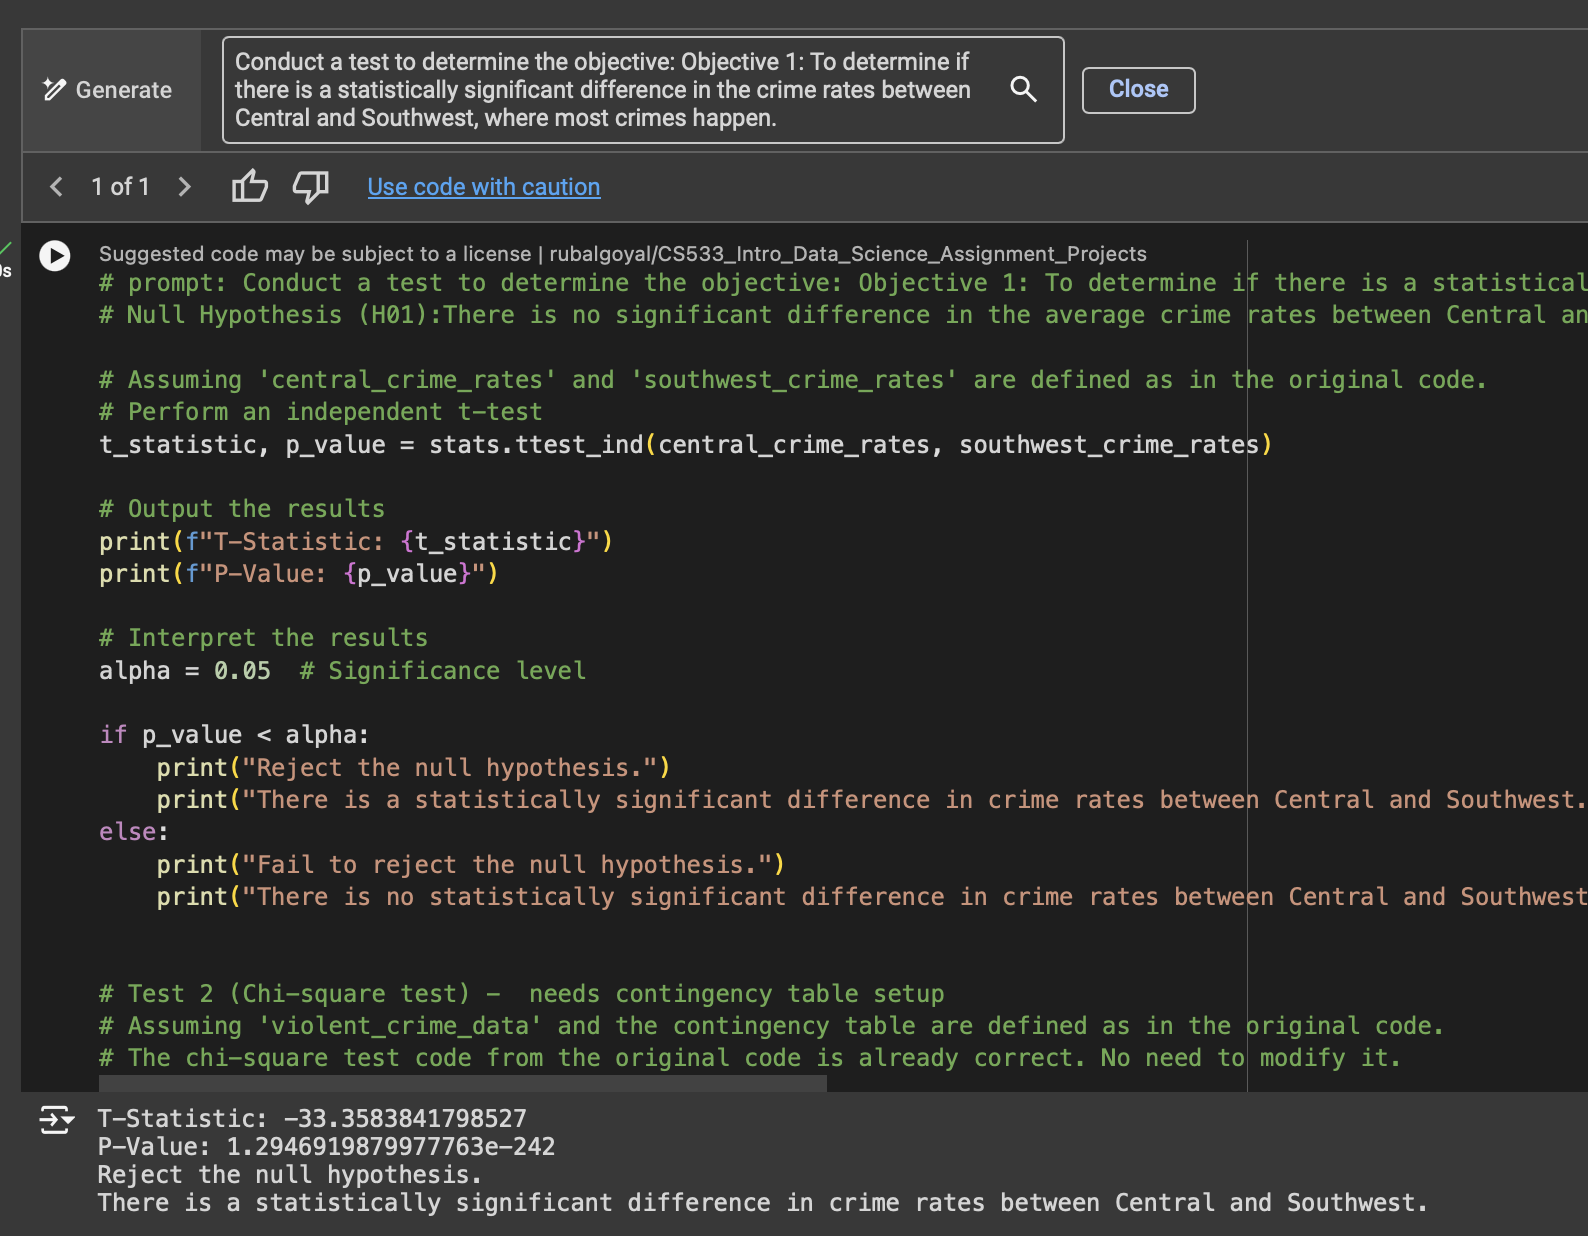

##### Test 2

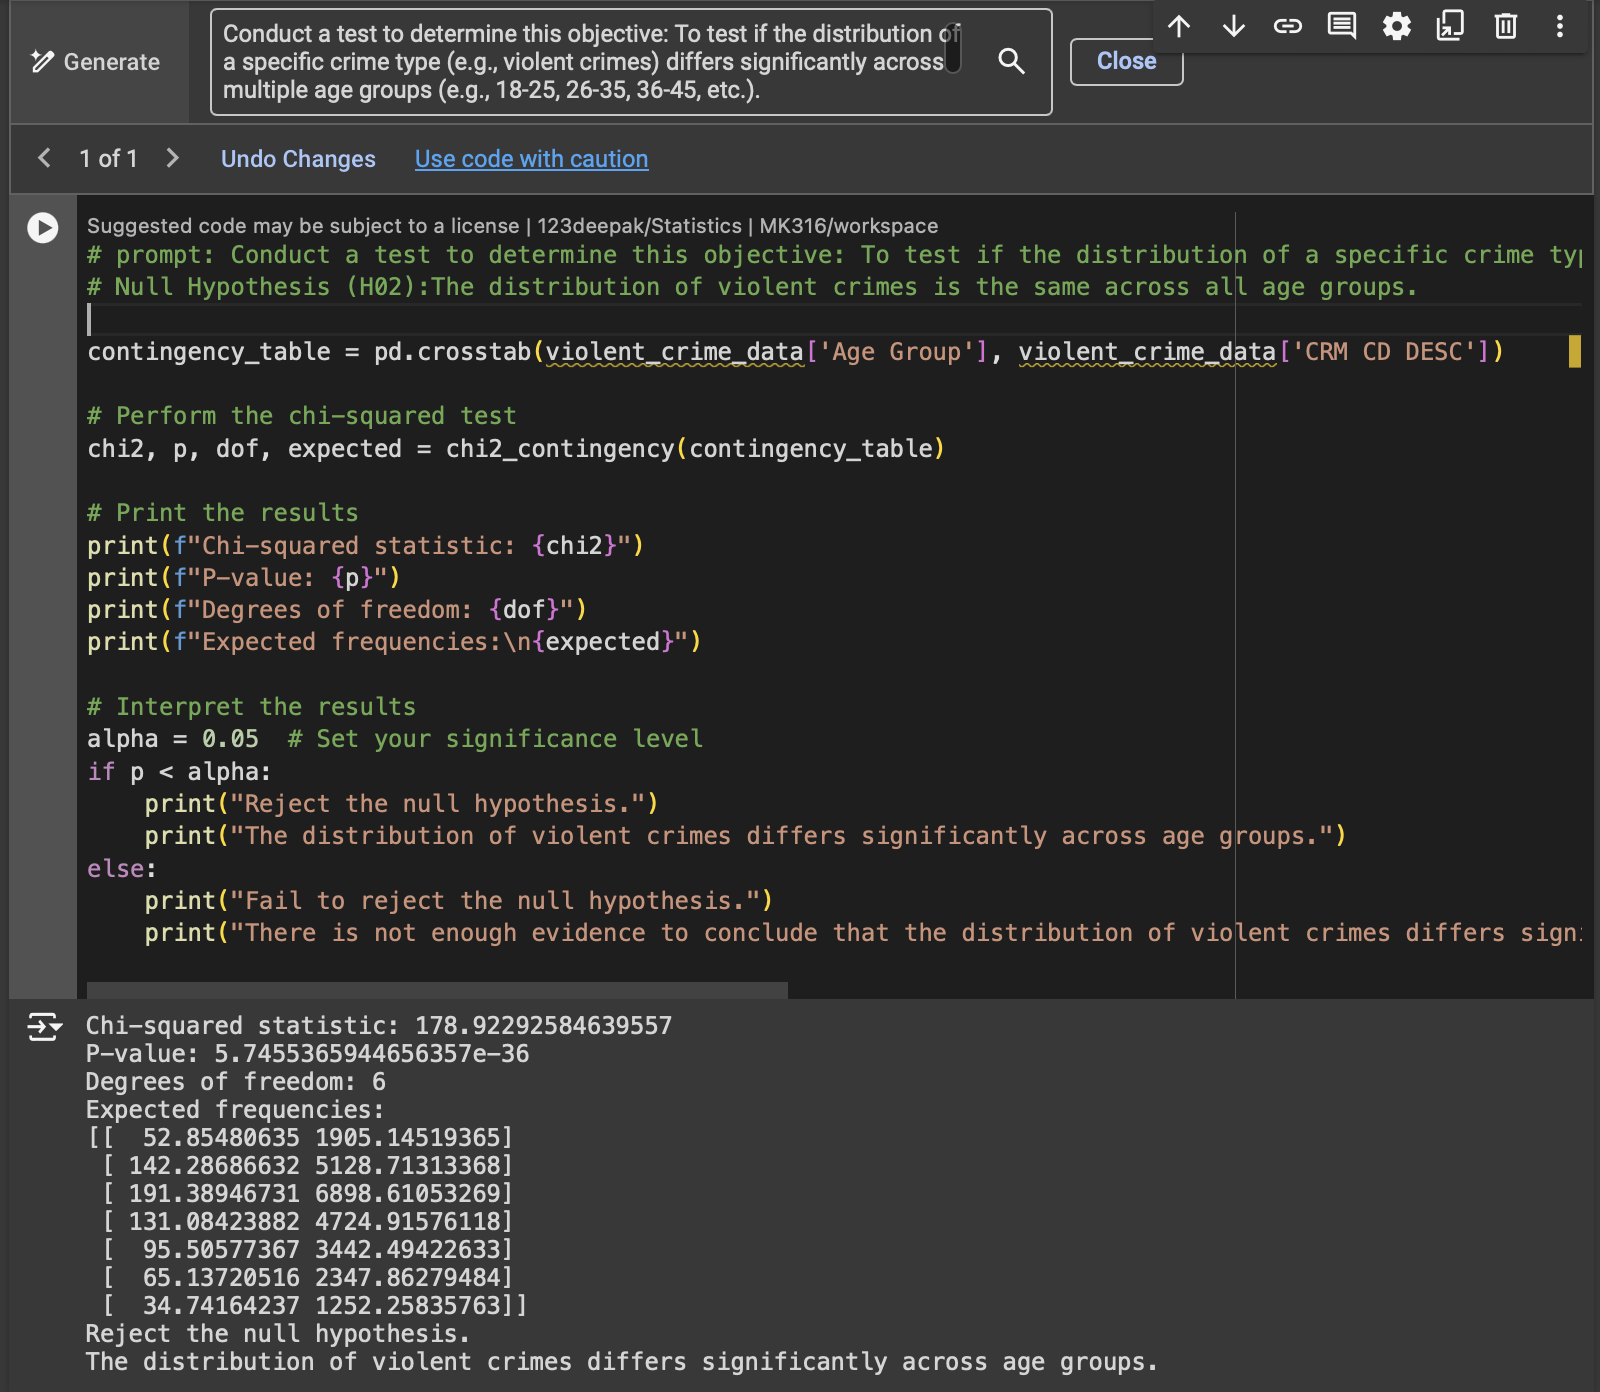

##### Result comparison: Test 1: The LLM suggested a t-test, which is valid for comparing means if crime rates are treated as continuous and normal data. However, through normality test, I discovered that the explored data is not normally distributed, therefore, I used Chi-Squared test to compare porportions of categorical data. In both, it’s implied that there is a significant difference between the two areas based on the very small p-value.

##### Test 2:Both the LLM code and my results show the same thing from the same Chi-Square Test of Independence. And the conclusion was consistent across both: violent crime distributions differ significantly across age groups.



## Problem 3.4
### Data speak:
##### Test 1: Since the p-value is much smaller than the common significance level of 0.05, it means that there is a statistically significant difference in crime rates between Central and Southwest.
##### The Chi-Square statistic is large, indicating that the difference in crime counts between the two areas is highly unlikely to have occurred by chance.
##### Type I Error (False Positive): The risk is incorrect conclusion that the crime rates between Central and Southwest are different when, in reality, they are not. However, given the extremely low p-value, the risk of this error is minimal.

##### Type II Error (False Negative): The risk of missing a true difference is very low, as the p-value is so small.

##### Test 2: The small p value means that there is a statistically significant difference in the distribution of violent crimes across different age groups. The large Chi-Square statistic indicates that the observed differences in crime distribution across age groups are very unlikely to be due to chance.
##### Type I Error (False Positive): The chance of mistakenly concluding that age groups differ in their crime patterns when they do not is extremely low, given the small p-value.

##### Type II Error (False Negative): The risk of missing a true difference in crime distribution across age groups is also very low due to the very small p-value.

### Innovation Speak:
##### Test 1: There is a significant difference in crime rates between Central and Southwest.

##### Central and Southwest are experiencing significantly different crime levels. This could be due to a variety of factors such as population density, law enforcement presence, socioeconomic differences, or environmental factors. Consider implementing area-specific crime prevention strategies based on the observed disparity.

##### Test 2: There is a significant difference in the distribution of violent crimes across age groups.

##### Different age groups are involved in violent crimes at varying rates. This could suggest that certain age groups are more prone to committing violent crimes or are more often involved as victims. The data can be used to customize interventions based on the age-specific trends. Programs could include school-based education on conflict resolution for younger groups or community-driven safety programs for older age groups.

## Problem 4.1. Construct a dashboard

In [72]:
!pip install streamlit

In [73]:
!wget -q -O - ipv4.icanhazip.com

34.125.69.172


In [79]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv')
df.head()

st.title('US Crime Dashboard')

df.replace("", np.nan, inplace=True)
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: f"{int(x):04}")

categorical_columns = ['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent',
                       'Premis Desc', 'Status', 'Status Desc', 'Weapon Desc']
for col in categorical_columns:
    # Strip whitespace and convert to consistent casing
    df[col] = df[col].str.strip().str.upper()
    # Convert to categorical dtype
    df[col] = df[col].astype('category')
# Filter Vict Age to a realistic range (0 < age < 120)
df = df[(df['Vict Age'] > 0) & (df['Vict Age'] < 120)]

# Validate latitude and longitude ranges (for Los Angeles, typical lat/lon range)
df = df[(df['LAT'].between(33, 35)) & (df['LON'].between(-119, -117))]
df.rename(columns=lambda x: x.upper(), inplace=True)

st.header('Scatter Plot of VICT AGE vs Latitude and Longitude')
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['LAT'], df['LON'], c=df['VICT AGE'], cmap='viridis', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of VICT AGE vs Latitude and Longitude')
plt.colorbar(label='VICT AGE')

# Show the plot in Streamlit
st.pyplot(plt)

st.header('Frequency Map: Distribution of Victim Ages')

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['VICT AGE'], bins=20, kde=True)
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages')

# Show the plot in Streamlit
st.pyplot(plt)

st.header('Correlation Matrix Heatmap')
correlation_matrix = df[['VICT AGE', 'LAT', 'LON']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
st.pyplot(plt)

# Section 3: Statistical Test Results
st.header('Statistical Test Conclusions')

# Test 1: Chi-Square Test between Central and Southwest
chi_square_stat1 = 166.12  # Example value from your test
p_value1 = 5.22e-38  # Example value from your test
central_count = 50751
southwest_count = 46727

# Display test 1 conclusion
st.subheader('Test 1: Crime Rates Between Central and Southwest')
st.write(f"Chi-Square Statistic: {chi_square_stat1}")
st.write(f"P-Value: {p_value1}")
st.write(f"Central Crime Count: {central_count}")
st.write(f"Southwest Crime Count: {southwest_count}")

if p_value1 < 0.05:
    st.markdown("**Conclusion**: There is a significant difference in the crime rates between Central and Southwest.")
    st.markdown("""
    - **Key Finding**: There is a significant difference in crime rates between Central and Southwest.
    - **Actionable Insights**: Central and Southwest are experiencing significantly different crime levels. This could be due to factors such as population density, law enforcement presence, or socioeconomic differences.
    - **Innovation Implication**: You might need to prioritize resource allocation or interventions in the area with the higher crime rate. Consider implementing area-specific crime prevention strategies based on the observed disparity.
    """)
else:
    st.markdown("**Conclusion**: There is no significant difference in the crime rates between Central and Southwest.")

# Test 2: Chi-Square Test for Crime Type Distribution Across Age Groups
chi_square_stat2 = 178.92  # Example value from your test
p_value2 = 5.75e-36  # Example value from your test
degrees_of_freedom = 6

# Display test 2 conclusion
st.subheader('Test 2: Distribution of Violent Crimes Across Age Groups')
st.write(f"Chi-Square Statistic: {chi_square_stat2}")
st.write(f"P-Value: {p_value2}")
st.write(f"Degrees of Freedom: {degrees_of_freedom}")

if p_value2 < 0.05:
    st.markdown("**Conclusion**: There is a significant difference in the distribution of violent crimes across age groups.")
    st.markdown("""
    - **Key Finding**: There is a significant difference in the distribution of violent crimes across age groups.
    - **Actionable Insights**: Different age groups are involved in violent crimes at varying rates. This suggests that certain age groups are more prone to committing violent crimes.
    - **Innovation Implication**: You can develop age-targeted interventions. For example, if younger age groups are more involved in violent crimes, focus on youth outreach programs or educational interventions.
    """)
else:
    st.markdown("**Conclusion**: There is no significant difference in the distribution of violent crimes across age groups.")

# Section 4: Data Table (Optional)
st.header('Crime Data Overview')
st.dataframe(df.head())


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.69.172:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 